# Problem statement - To predict the passenger is survied or not 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Datasets/titanic-training-data.csv")

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
370,371,1,1,"Harder, Mr. George Achilles",male,25.0,1,0,11765,55.4417,E50,C
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## Approach 1 - Drop null value rows

In [9]:
df1 = df.dropna(axis=0)
df1.shape

(712, 8)

In [10]:
df1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [11]:
df1 = pd.get_dummies(df1,columns = ['Sex','Embarked'])
df1.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [12]:
X1 = df1.drop('Survived',axis=1)
y1 = df1['Survived']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.30,random_state=0)

In [14]:
model_1 = LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
model_1.score(X_train,y_train)

0.8152610441767069

In [16]:
model_1.score(X_test,y_test)

0.7757009345794392

In [17]:
predictions = model_1.predict(X_test)

In [18]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,predictions)

0.7757009345794392

<Axes: >

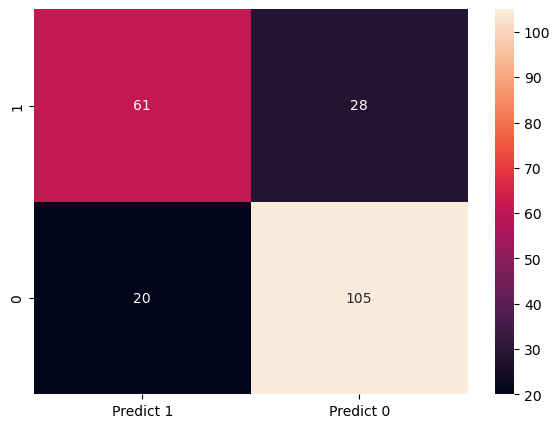

In [20]:
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']], columns = [i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [21]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       125
           1       0.75      0.69      0.72        89

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.77      0.78      0.77       214



## Approach 2 - Replace null values with mean and mode

In [22]:
df2 = df.copy()
df2.shape

(891, 8)

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [24]:
df2['Age'] = df2['Age'].replace(np.nan,df2['Age'].mean())

In [25]:
mode = df2['Embarked'].mode()[0]
df2['Embarked'] = df2['Embarked'].replace(np.nan,mode)

In [26]:
df2 = pd.get_dummies(df2,columns=['Sex','Embarked'])
df2.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [27]:
X2 = df2.drop('Survived',axis=1)
y2 = df2['Survived']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.15,random_state=0)

In [29]:
model_2 = LogisticRegression()
model_2.fit(X_train,y_train)

C:\Users\dell\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model_2.score(X_train,y_train)

0.8018494055482166

In [31]:
model_2.score(X_test,y_test)

0.7910447761194029

## Approach 3 - Replace null values with median and mode

In [32]:
df3 = df.copy()
df3.shape

(891, 8)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [34]:
df3['Age'] = df3['Age'].replace(np.nan,df3['Age'].median())

In [35]:
mode = df3['Embarked'].mode()[0]
df3['Embarked'] = df3['Embarked'].replace(np.nan,mode)

In [36]:
df3 = pd.get_dummies(df3,columns=['Sex','Embarked'])
df3.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [37]:
X3 = df3.drop('Survived',axis=1)
y3 = df3['Survived']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.15,random_state=0)

In [39]:
model_3 = LogisticRegression()
model_3.fit(X_train,y_train)

C:\Users\dell\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
model_3.score(X_train,y_train)

0.8044914134742405

In [41]:
model_3.score(X_test,y_test)

0.7985074626865671

## Approach 4 - Standard Scaler with droping null value rows

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
df4 = df.copy()

In [44]:
df4.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
df4.dropna(axis=0,inplace=True)
df4.shape

(712, 8)

In [46]:
df4 = pd.get_dummies(df4,columns=['Sex','Embarked'])

In [47]:
std_scale = StandardScaler()
std_scale

StandardScaler()

In [48]:
df4['Age'] = std_scale.fit_transform(df4[['Age']])
df4['SibSp'] = std_scale.fit_transform(df4[['SibSp']])
df4['Parch'] = std_scale.fit_transform(df4[['Parch']])
df4['Fare'] = std_scale.fit_transform(df4[['Fare']])

In [49]:
X4 = df4.drop('Survived',axis=1)
y4 = df4['Survived']

X_train,X_test,y_train,y_test = train_test_split(X4,y4,test_size=0.15,random_state=0)

model_4 = LogisticRegression()
model_4.fit(X_train,y_train)

LogisticRegression()

In [50]:
model_4.score(X_train,y_train)

0.8

In [51]:
model_4.score(X_test,y_test)

0.8037383177570093

## Approach 5 - Standard Scaler with mean and mode

In [52]:
df5 = df.copy()

In [53]:
df5['Age'] = df5['Age'].replace(np.nan,df5['Age'].mean())
mode = df5['Embarked'].mode()[0]
df5['Embarked'] = df5['Embarked'].replace(np.nan,mode)

In [54]:
df5 = pd.get_dummies(df5,columns=['Sex','Embarked'])
df5.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [55]:
df5['Age'] = std_scale.fit_transform(df5[['Age']])
df5['SibSp'] = std_scale.fit_transform(df5[['SibSp']])
df5['Parch'] = std_scale.fit_transform(df5[['Parch']])
df5['Fare'] = std_scale.fit_transform(df5[['Fare']])

In [56]:
X5 = df5.drop('Survived',axis=1)
y5 = df5['Survived']

X_train,X_test,y_train,y_test = train_test_split(X5,y5,test_size=0.15,random_state=0)

model_5 = LogisticRegression()
model_5.fit(X_train,y_train)

LogisticRegression()

In [57]:
model_5.score(X_train,y_train)

0.8005284015852048

In [58]:
model_5.score(X_test,y_test)

0.7910447761194029

## Approach 6 - Standard Scaler with median and mode

In [59]:
df6 = df.copy()

In [60]:
df6['Age'] = df6['Age'].replace(np.nan,df6['Age'].median())
mode = df6['Embarked'].mode()[0]
df6['Embarked'] = df6['Embarked'].replace(np.nan,mode)

In [61]:
df6 = pd.get_dummies(df6,columns=['Sex','Embarked'])
df6.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [62]:
df6['Age'] = std_scale.fit_transform(df6[['Age']])
df6['SibSp'] = std_scale.fit_transform(df6[['SibSp']])
df6['Parch'] = std_scale.fit_transform(df6[['Parch']])
df6['Fare'] = std_scale.fit_transform(df6[['Fare']])

In [63]:
X6 = df6.drop('Survived',axis=1)
y6 = df6['Survived']

X_train,X_test,y_train,y_test = train_test_split(X6,y6,test_size=0.15,random_state=0)

model_6 = LogisticRegression()
model_6.fit(X_train,y_train)

LogisticRegression()

In [64]:
model_6.score(X_train,y_train)

0.7992073976221928

In [65]:
model_6.score(X_test,y_test)

0.7910447761194029

## Approach 7 - KNN model

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.30,random_state=0)

In [67]:
model_7 = KNeighborsClassifier(n_neighbors=7,p=1)
model_7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [68]:
model_7.score(X_train,y_train)

0.8234349919743178

In [69]:
model_7.score(X_test,y_test)

0.75

In [72]:
for i in range(1,51,2):
    model_7 = KNeighborsClassifier(n_neighbors=i)
    model_7.fit(X_train,y_train)
    print(i)
    print('train-',model_7.score(X_train,y_train))
    print('test-',model_7.score(X_test,y_test),'\n')

1
train- 0.9759229534510433
test- 0.7164179104477612 

3
train- 0.8378812199036918
test- 0.7164179104477612 

5
train- 0.7961476725521669
test- 0.7313432835820896 

7
train- 0.7768860353130016
test- 0.7201492537313433 

9
train- 0.7431781701444623
test- 0.7014925373134329 

11
train- 0.7383627608346709
test- 0.7313432835820896 

13
train- 0.7287319422150883
test- 0.7276119402985075 

15
train- 0.7207062600321027
test- 0.7313432835820896 

17
train- 0.7223113964686998
test- 0.753731343283582 

19
train- 0.7335473515248796
test- 0.7388059701492538 

21
train- 0.7367576243980738
test- 0.746268656716418 

23
train- 0.7223113964686998
test- 0.753731343283582 

25
train- 0.7078651685393258
test- 0.7388059701492538 

27
train- 0.7110754414125201
test- 0.7201492537313433 

29
train- 0.7078651685393258
test- 0.7164179104477612 

31
train- 0.7110754414125201
test- 0.7388059701492538 

33
train- 0.7014446227929374
test- 0.753731343283582 

35
train- 0.6853932584269663
test- 0.7425373134328358 

3

## Approach 8 - KNN Model with standardization

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X6,y6,test_size=0.30,random_state=0)

In [74]:
model_8 = KNeighborsClassifier()
model_8.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
model_8.score(X_train,y_train)

0.85553772070626

In [76]:
model_8.score(X_test,y_test)

0.8059701492537313

In [77]:
for i in range(1,51,2):
    model_8 = KNeighborsClassifier(n_neighbors=i)
    model_8.fit(X_train,y_train)
    print(i)
    print('train-',model_8.score(X_train,y_train))
    print('test-',model_8.score(X_test,y_test),'\n')

1
train- 0.9759229534510433
test- 0.753731343283582 

3
train- 0.8667736757624398
test- 0.7835820895522388 

5
train- 0.85553772070626
test- 0.8059701492537313 

7
train- 0.8426966292134831
test- 0.7761194029850746 

9
train- 0.8394863563402889
test- 0.8022388059701493 

11
train- 0.8378812199036918
test- 0.8059701492537313 

13
train- 0.8298555377207063
test- 0.8171641791044776 

15
train- 0.8234349919743178
test- 0.8208955223880597 

17
train- 0.8298555377207063
test- 0.8097014925373134 

19
train- 0.8218298555377207
test- 0.8059701492537313 

21
train- 0.8234349919743178
test- 0.8134328358208955 

23
train- 0.8186195826645265
test- 0.8097014925373134 

25
train- 0.8202247191011236
test- 0.8097014925373134 

27
train- 0.8298555377207063
test- 0.8059701492537313 

29
train- 0.8250401284109149
test- 0.8059701492537313 

31
train- 0.8218298555377207
test- 0.8022388059701493 

33
train- 0.8234349919743178
test- 0.8134328358208955 

35
train- 0.8186195826645265
test- 0.8097014925373134 



In [78]:
for i in range(1,50,2):
    model_8 = KNeighborsClassifier(n_neighbors=i,p=1)
    model_8.fit(X_train,y_train)
    print(i)
    print('train-',model_8.score(X_train,y_train))
    print('test-',model_8.score(X_test,y_test),'\n')

1
train- 0.9759229534510433
test- 0.7649253731343284 

3
train- 0.8683788121990369
test- 0.7873134328358209 

5
train- 0.8635634028892456
test- 0.7686567164179104 

7
train- 0.8539325842696629
test- 0.7873134328358209 

9
train- 0.8507223113964687
test- 0.8097014925373134 

11
train- 0.841091492776886
test- 0.8097014925373134 

13
train- 0.8443017656500803
test- 0.8171641791044776 

15
train- 0.8426966292134831
test- 0.8171641791044776 

17
train- 0.8426966292134831
test- 0.8283582089552238 

19
train- 0.8346709470304976
test- 0.8246268656716418 

21
train- 0.8186195826645265
test- 0.8134328358208955 

23
train- 0.8154093097913323
test- 0.8022388059701493 

25
train- 0.812199036918138
test- 0.7985074626865671 

27
train- 0.812199036918138
test- 0.7947761194029851 

29
train- 0.8089887640449438
test- 0.7910447761194029 

31
train- 0.812199036918138
test- 0.7910447761194029 

33
train- 0.812199036918138
test- 0.7985074626865671 

35
train- 0.812199036918138
test- 0.7985074626865671 

37


#  Approach 9 -Decision Tree

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.30,random_state=0)

model_9 = DecisionTreeClassifier()
model_9.fit(X_train,y_train)

print('train -',model_9.score(X_train,y_train))
print('test -',model_9.score(X_test,y_test))

train - 0.9791332263242376
test - 0.7723880597014925


In [82]:
model_10 = DecisionTreeClassifier(criterion="entropy")
model_10.fit(X_train,y_train)

print('train -',model_10.score(X_train,y_train))
print('test -',model_10.score(X_test,y_test))

train - 0.9791332263242376
test - 0.7611940298507462


In [91]:
#for i in range(3,11):
model_11 = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model_11.fit(X_train,y_train)
    #print(i)
print('train -',model_11.score(X_train,y_train))
print('test -',model_11.score(X_test,y_test),'\n')

train - 0.8394863563402889
test - 0.8208955223880597 



In [88]:
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system

In [93]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(model_9, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [94]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree1.dot','w')
dot_data = tree.export_graphviz(model_11, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()